<a href="https://colab.research.google.com/github/PozdeevDA1/ML/blob/main/Pozdeev_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение

В данном разделе реализован импорт пакетов и первычный анализ датасета (основная информация, его размеры)

In [2]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

На первый взгляд импорт может показаться достаточно большим, но начиная писать данный код, я еще не был уверен в том, что именно мне понадобится. Поэтому пока я импортировал сразу 5 метрик, посмотрим что пригодится ;)

In [3]:
# Read the dataset
dataframe= pd.read_excel("Date_Fruit_Datasets.xlsx")
dataframe.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [4]:
# dataframe info
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [5]:
# describe the dataset
dataframe.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [6]:
# Check the duplicate values in the dataset
dataframe.duplicated().sum()

0

In [7]:
# Check Is there any null values in the dataset
dataframe.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

In [8]:
dataframe.shape

(898, 35)

# Поиск основных зависимостей между столбцами, используем визуализацию


In [9]:
# HEATMAP
correlation_matrix=dataframe.corr()
correlation_matrix

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
AREA,1.000000,0.956494,0.878893,0.954899,-0.370303,0.993243,0.027371,0.998886,-0.086286,-0.095342,...,0.433323,0.218253,0.326335,0.381096,-0.359332,-0.393124,-0.506256,-0.353446,-0.380747,-0.376277
PERIMETER,0.956494,1.000000,0.960734,0.859990,-0.166816,0.959938,-0.133857,0.963489,-0.214632,0.018308,...,0.415364,0.313334,0.398168,0.364269,-0.266206,-0.294308,-0.416802,-0.451028,-0.468571,-0.448409
MAJOR_AXIS,0.878893,0.960734,1.000000,0.721133,0.063090,0.886277,-0.166982,0.886948,-0.279951,0.111631,...,0.412055,0.366579,0.460468,0.347940,-0.146311,-0.167972,-0.297395,-0.530231,-0.538497,-0.506782
MINOR_AXIS,0.954899,0.859990,0.721133,1.000000,-0.607120,0.948006,0.059613,0.951470,0.028003,-0.150407,...,0.396219,0.093267,0.189532,0.354742,-0.466776,-0.501442,-0.585234,-0.196256,-0.231847,-0.246312
ECCENTRICITY,-0.370303,-0.166816,0.063090,-0.607120,1.000000,-0.335085,-0.220434,-0.356565,-0.342775,0.110238,...,-0.177619,0.215284,0.194135,-0.179358,0.431537,0.463969,0.442189,-0.252331,-0.238875,-0.180563
EQDIASQ,0.993243,0.959938,0.886277,0.948006,-0.335085,1.000000,0.018777,0.993397,-0.112353,-0.157370,...,0.424774,0.225588,0.336750,0.369371,-0.346338,-0.376846,-0.490680,-0.372169,-0.408394,-0.400709
SOLIDITY,0.027371,-0.133857,-0.166982,0.059613,-0.220434,0.018777,1.000000,-0.016449,0.392552,-0.189234,...,0.033952,-0.128394,-0.062084,0.069564,-0.038697,-0.040841,-0.057491,0.076950,0.054499,0.052089
CONVEX_AREA,0.998886,0.963489,0.886948,0.951470,-0.356565,0.993397,-0.016449,1.000000,-0.107403,-0.095457,...,0.429640,0.225350,0.330451,0.375691,-0.356994,-0.390580,-0.503137,-0.358603,-0.385656,-0.380788
EXTENT,-0.086286,-0.214632,-0.279951,0.028003,-0.342775,-0.112353,0.392552,-0.107403,1.000000,0.067207,...,-0.077197,-0.330393,-0.322600,-0.046479,-0.217372,-0.207224,-0.179696,0.352850,0.337605,0.321010
ASPECT_RATIO,-0.095342,0.018308,0.111631,-0.150407,0.110238,-0.157370,-0.189234,-0.095457,0.067207,1.000000,...,0.050809,0.040208,-0.023360,0.058655,0.058019,0.061742,0.067152,-0.010716,0.076399,0.076425


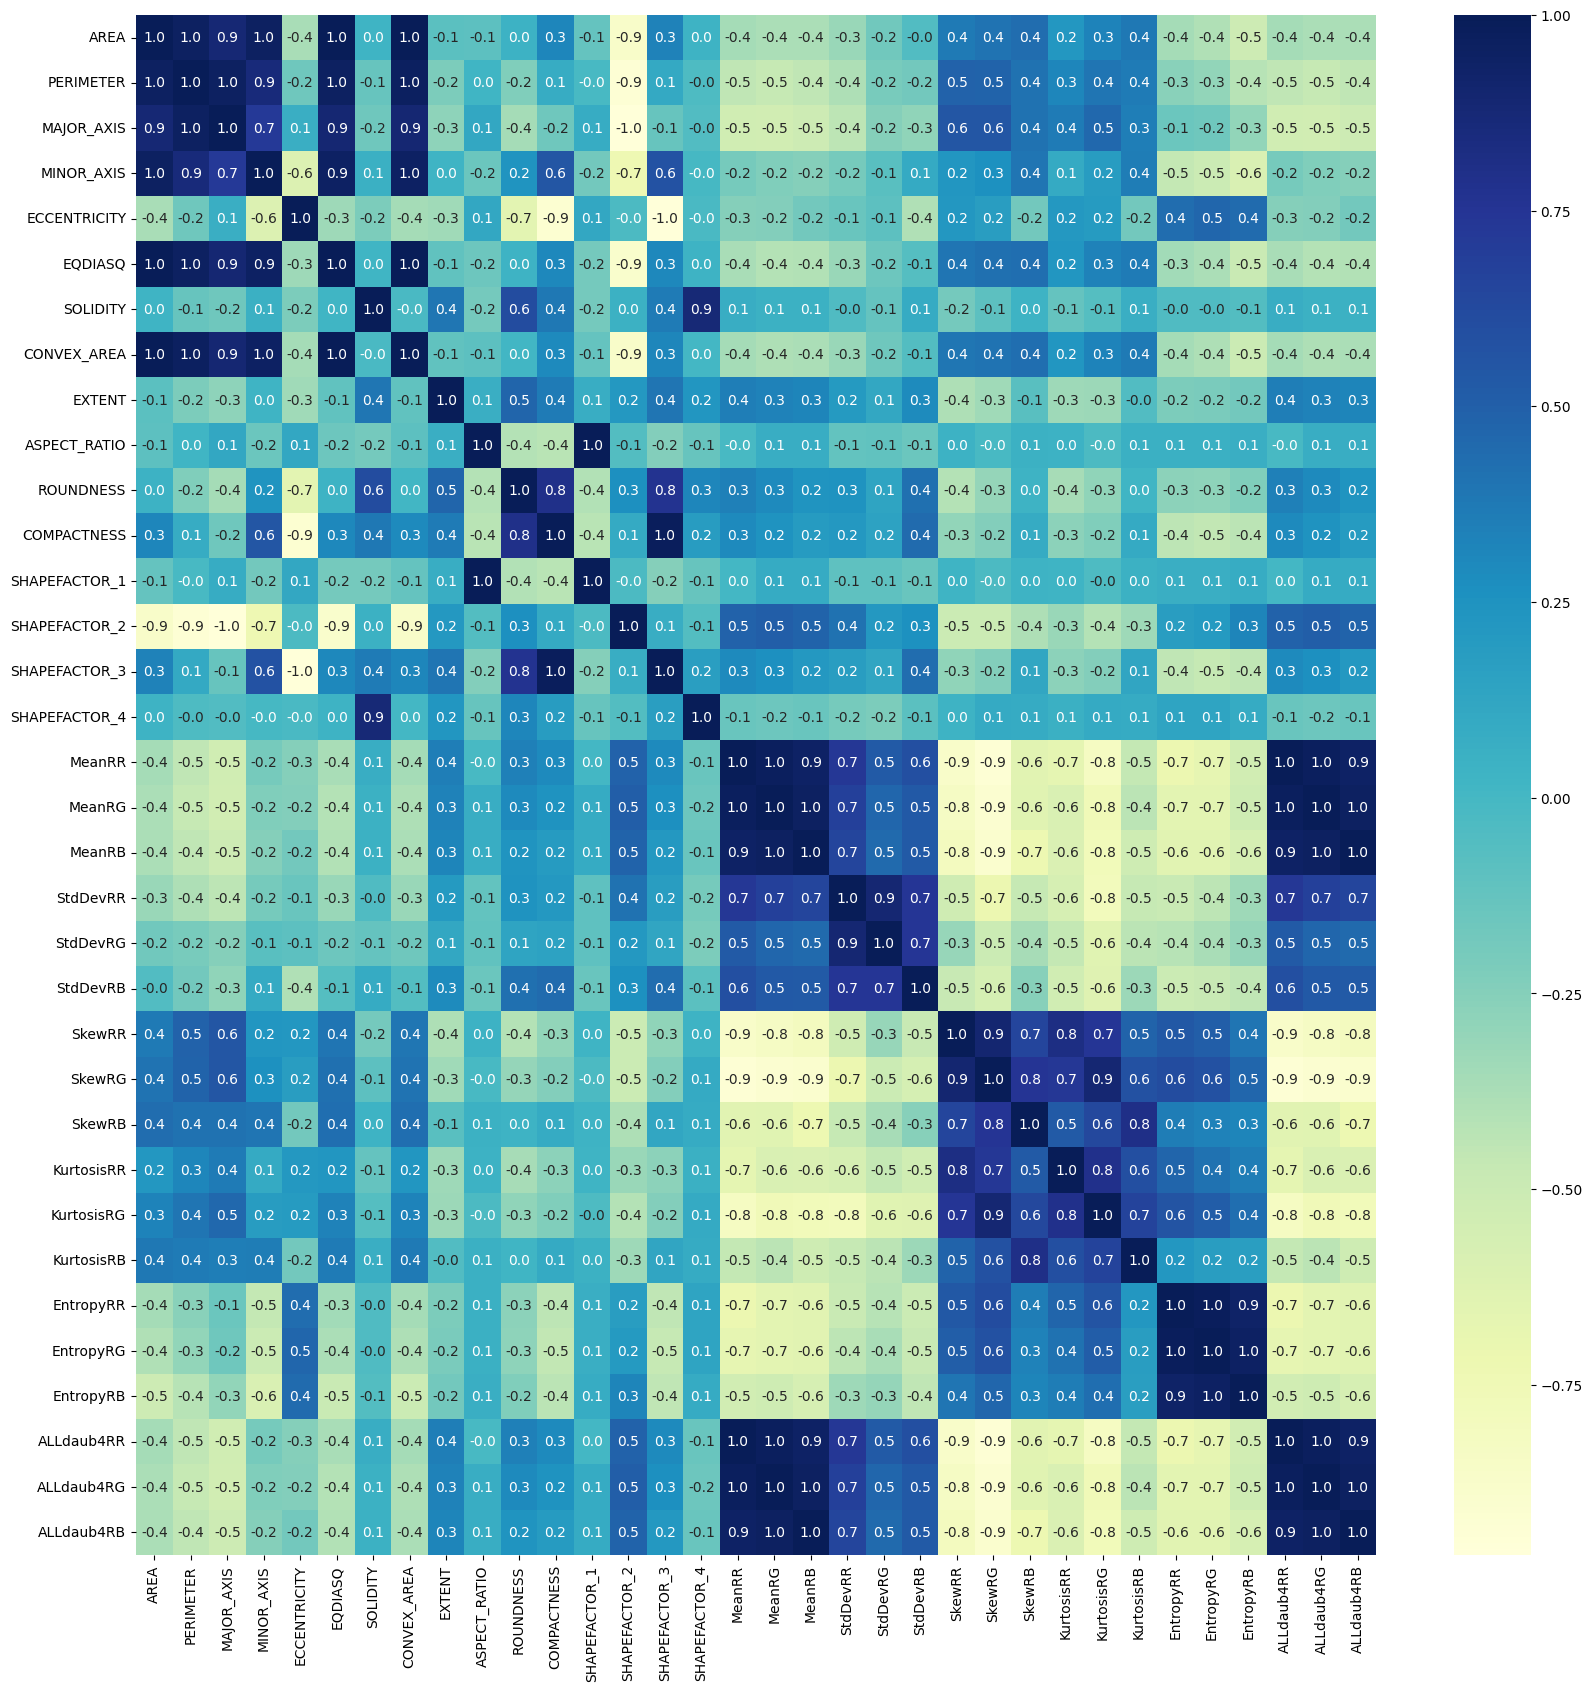

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="YlGnBu")
plt.show()

Сколько фиников каждого сорта?

In [11]:
dataframe.Class.value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

<Axes: >

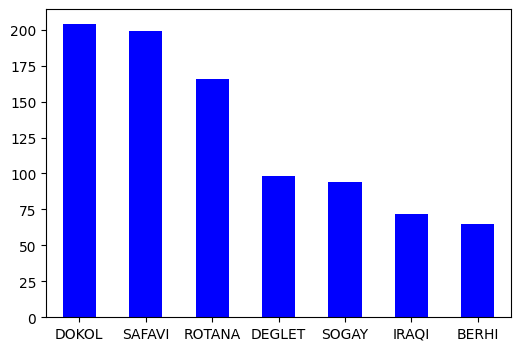

In [12]:
dataframe["Class"].value_counts().plot(kind="bar", figsize=(6,4), rot=0, color="Blue")

Распределение данных

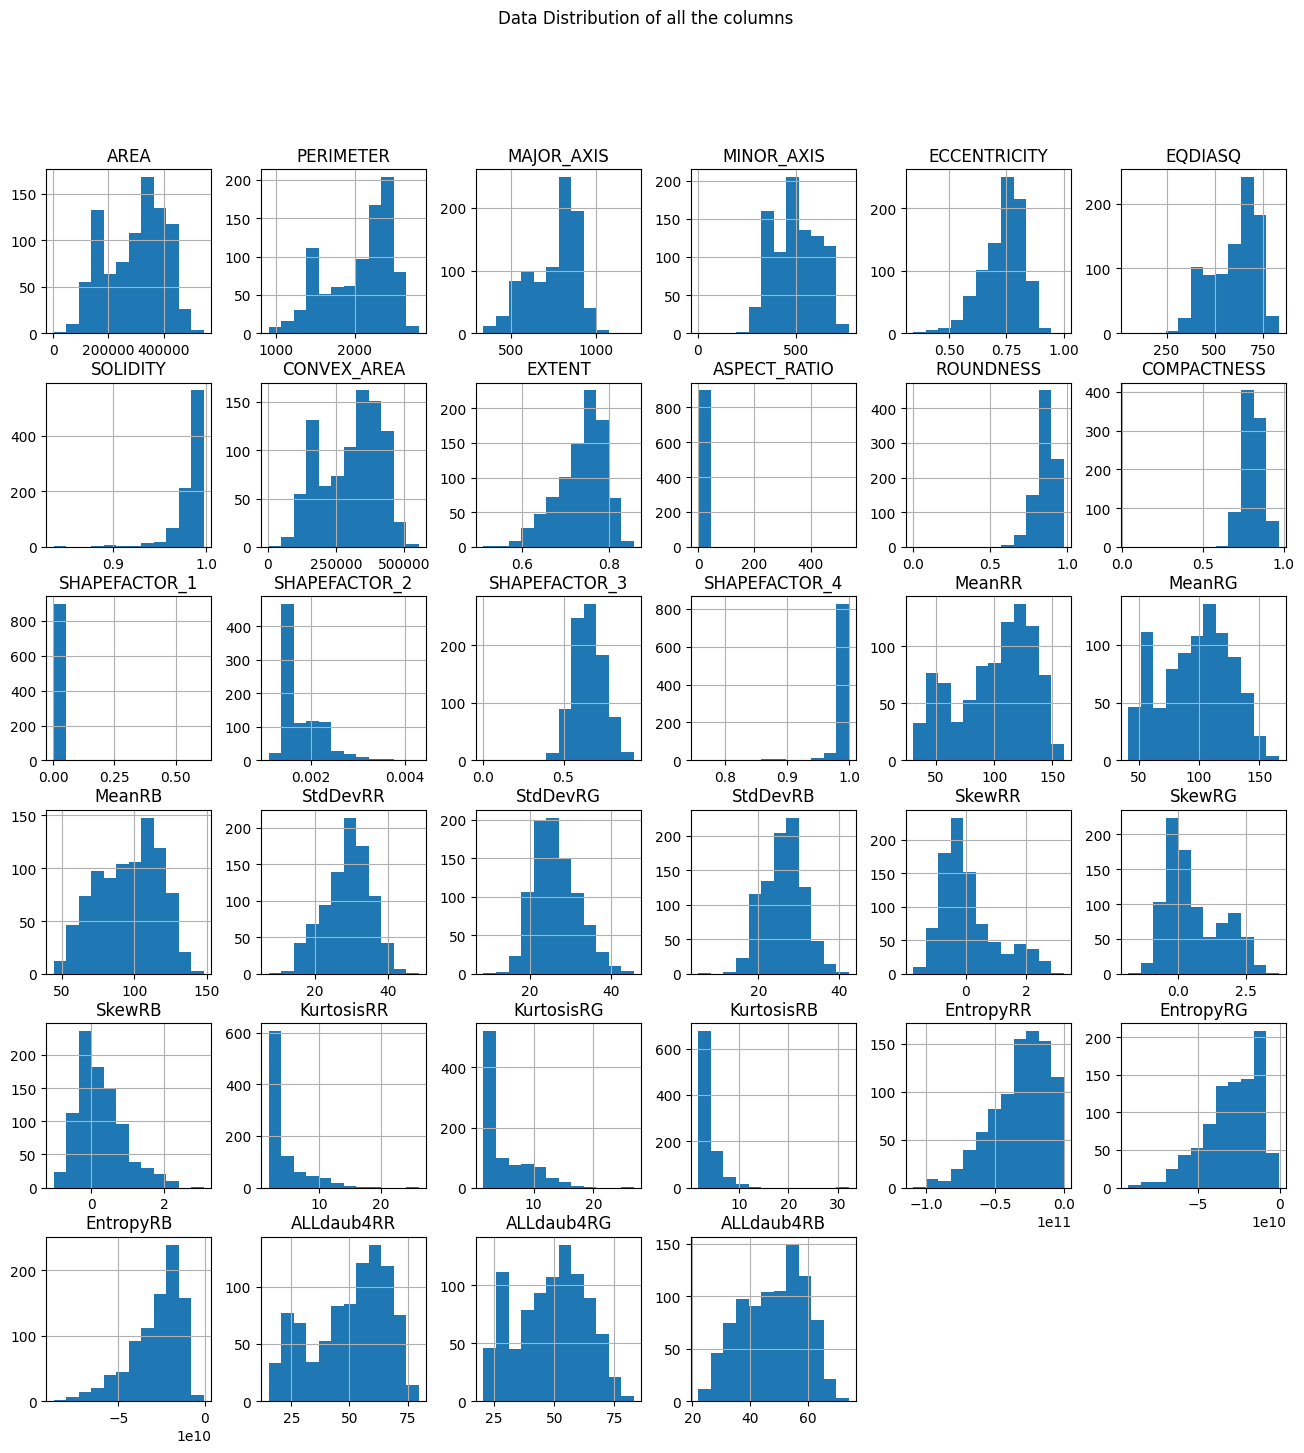

In [13]:
dataframe.hist(bins=12, figsize=(16,16), grid=True)
plt.suptitle("Data Distribution of all the columns")
plt.show()

Рассмотрим выбросы, с помощью "ящичной" диаграммы (box plot)

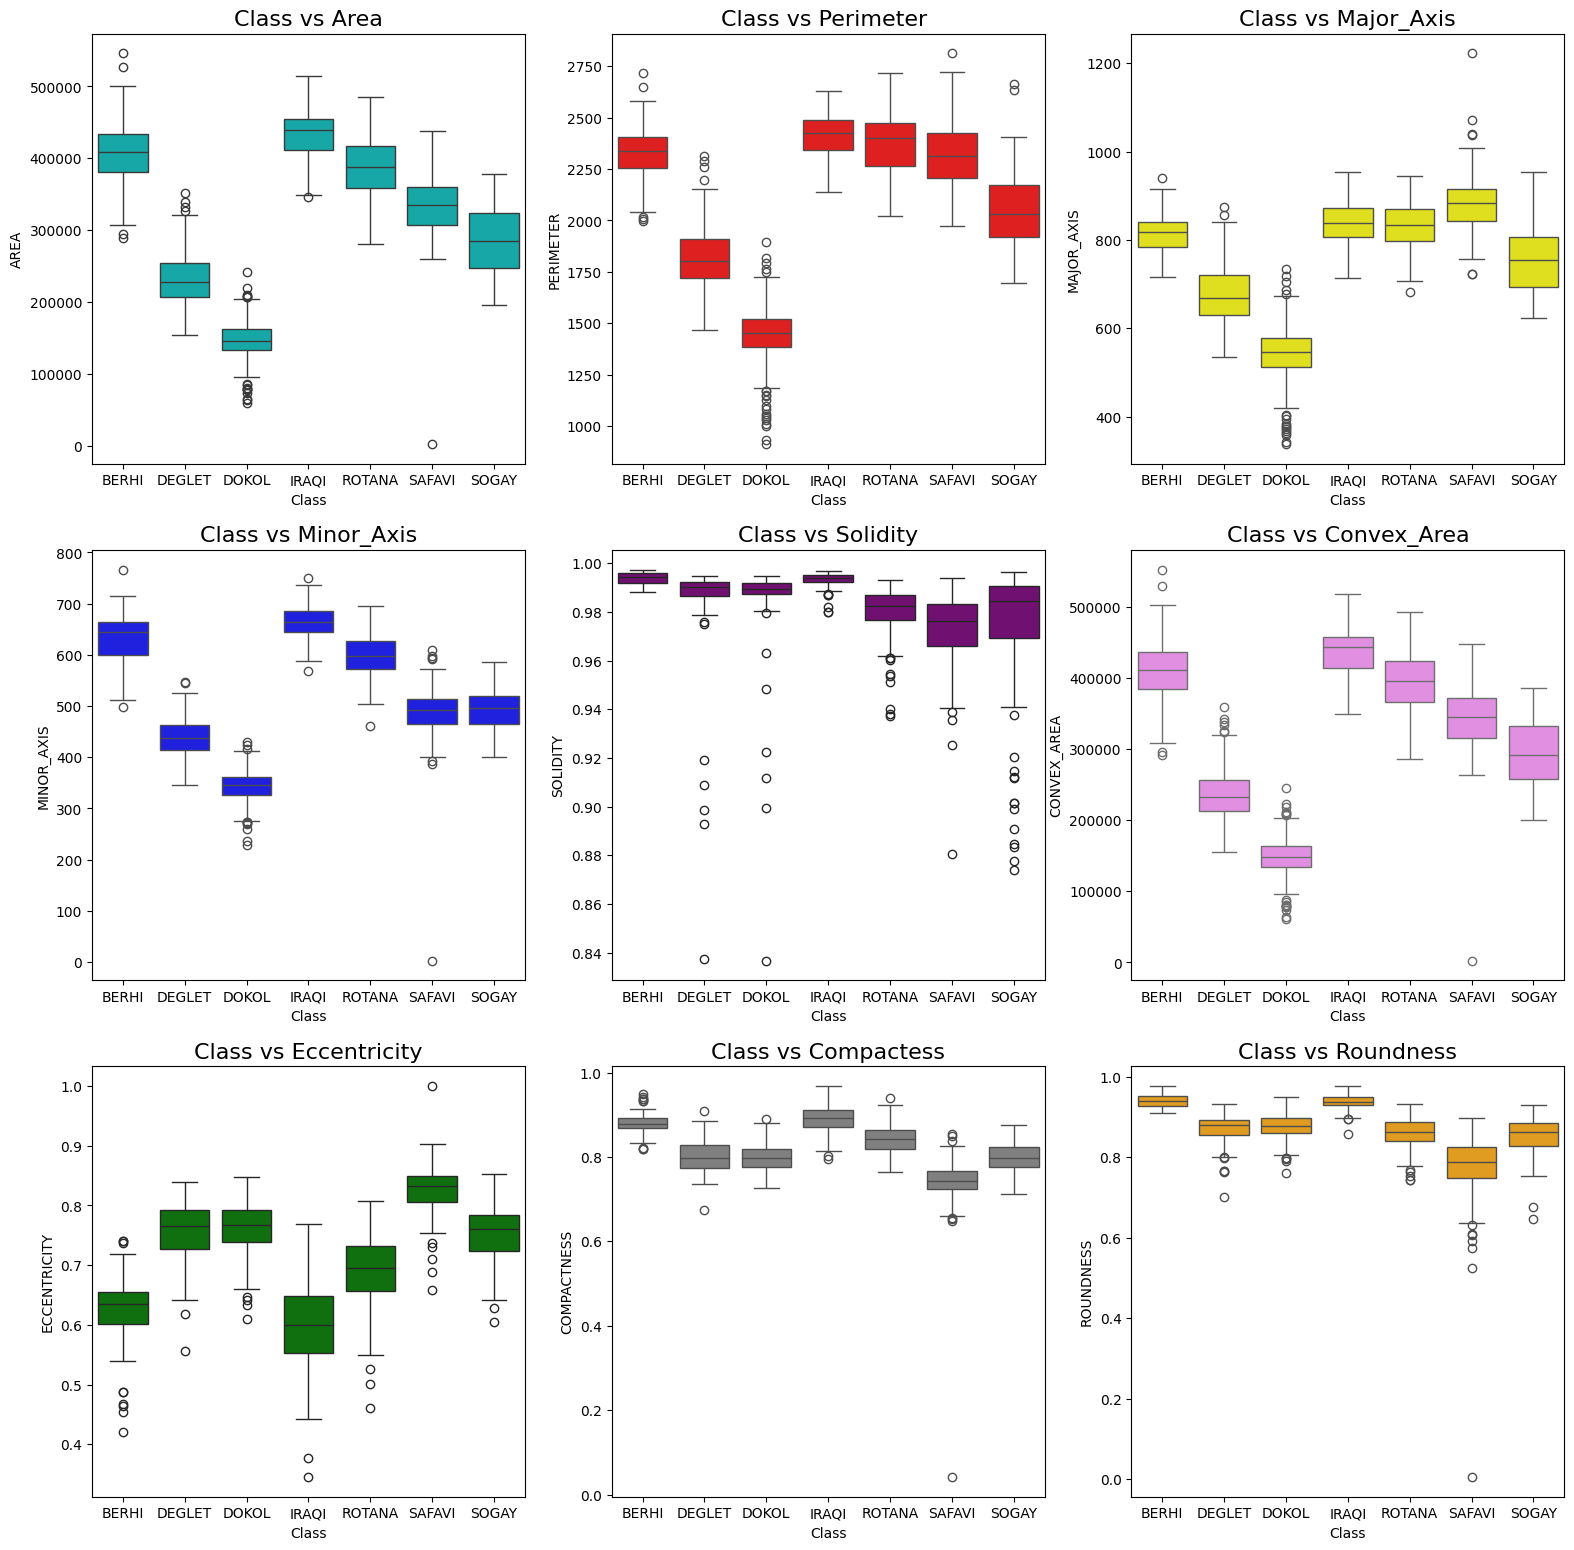

In [14]:
fig=plt.figure(figsize=(19,19))

ax=fig.add_subplot(331)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["AREA"], hue=None ,color='c',ax=ax)
ax.set_title('Class vs Area', fontsize=16)

ax=fig.add_subplot(332)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["PERIMETER"], hue=None ,color='red',ax=ax)
ax.set_title('Class vs Perimeter ', fontsize=16)

ax=fig.add_subplot(333)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["MAJOR_AXIS"], hue=None ,color='yellow',ax=ax)
ax.set_title('Class vs Major_Axis', fontsize=16)

ax=fig.add_subplot(334)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["MINOR_AXIS"], hue=None ,color='blue',ax=ax)
ax.set_title('Class vs Minor_Axis', fontsize=16)

ax=fig.add_subplot(335)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["SOLIDITY"], hue=None ,color='purple',ax=ax)
ax.set_title('Class vs Solidity', fontsize=16)

ax=fig.add_subplot(336)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["CONVEX_AREA"], hue=None ,color='violet',ax=ax)
ax.set_title('Class vs Convex_Area', fontsize=16)

ax=fig.add_subplot(337)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["ECCENTRICITY"], hue=None ,color='green',ax=ax)
ax.set_title('Class vs Eccentricity', fontsize=16)

ax=fig.add_subplot(338)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["COMPACTNESS"], hue=None ,color='grey',ax=ax)
ax.set_title('Class vs Compactess', fontsize=16)

ax=fig.add_subplot(339)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["ROUNDNESS"], hue=None ,color='orange',ax=ax)
ax.set_title('Class vs Roundness', fontsize=16)


plt.show()

In [15]:
dataframe.drop(["PERIMETER","MAJOR_AXIS","MINOR_AXIS","CONVEX_AREA","MeanRR","ALLdaub4RR","EntropyRG"], axis=1, inplace=True)

# Разбиваем датасет на тестовый и обучающий набор


In [16]:
def train_test_split_data(dataframe,target,test_size, random_state):
    x_train,x_test, y_train, y_test= train_test_split(dataframe.drop([target], axis=1),
                                                      dataframe[target],
                                                      test_size=test_size,
                                                      random_state=random_state,
                                                      stratify=dataframe[target]
                                                      )

    return x_train,x_test, y_train, y_test

In [17]:
x_train,x_test, y_train, y_test= train_test_split_data(dataframe,target="Class",test_size=0.3, random_state=42)

In [18]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((628, 27), (270, 27), (628,), (270,))

Введем функцию получающую числовые и категориальные столбцы

In [19]:
def get_numerical_and_categorical_columns(dataframe):

    numerical_cols = []
    categorical_cols = []
    for column in dataframe.columns:
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            numerical_cols.append(column)
        else:
            categorical_cols.append(column)

    return numerical_cols, categorical_cols

In [20]:
numerical_cols, categorical_cols=get_numerical_and_categorical_columns(dataframe)

Аналогично с кодом выше, уберем выбросы из обучающегося набора

In [21]:
def Winsorization_Method(columns, x_train, y_train , a, b):
    outliers=[]

    for col in columns:
        q1= np.percentile(x_train[col], a)
        q2= np.percentile(x_train[col],b)

        for pos in range(len(x_train)):
            if x_train[col].iloc[pos]>q2 or x_train[col].iloc[pos]<q1:
                outliers.append(pos)

    outliers= set(outliers)                   # удалить дублирующиеся элементы из выбросов
    outliers= list(outliers)

    ratio= round(len(outliers)/len(x_train)*100, 2)                       # Соотношение выбросов
    x_train.drop(x_train.index[outliers], inplace=True)    # удалить выбросы из набора обучающих данных
    y_train.drop(y_train.index[outliers], inplace=True)



    return ratio, x_train, y_train

In [22]:
ratio_of_outliers,x_train,y_train= Winsorization_Method(numerical_cols, x_train, y_train, a=0.2, b=99.2)

In [23]:
ratio_of_outliers

14.81

In [24]:
x_train.shape, y_train.shape

((535, 27), (535,))

На этом заканчивается первое домашнее задание (ввиду ограниченности времени), во второй части планируется реализовать непосредственно машинное обучение с помощью логистической регрессии и дерева решений. Результат будем сравнивать между тремя функциями Precision, Recall, f1_score

Более подробное описание будет появляться по мере выполнения



-------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------

UPD
Продолжение и дополнение к первому заданию, хотел извиниться за то, что не выполнил сразу анализ до конца. К сожалению присоединился к курсу только к середине февраля, ввиду сильной заргруженности во время сессии (у меня она закончилась только 18 февраля) не мог выполнять задания, поэтому начало полчилось скомканным.

Исправляюсь и доделываю первое задание

# Предварительная обработка данных


Практически все функции (кроме class) являются числовыми, поэтому выполним для них числовое кодирование

In [25]:
robust_scaler= RobustScaler()
x_train=robust_scaler.fit_transform(x_train)
x_test=robust_scaler.transform(x_test)

А для классовой выполним категориальную кодировку соответственно

In [26]:
le = LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

# Моделирование

In [27]:
def modelling(x_train, x_test, y_train, y_test):
    # создадим пустой массив, для сохранения в него результатов
    precision=[]
    recall=[]
    f1=[]


    # создадим массивы для моделей
    models=[LogisticRegression(),
    GaussianNB(),
    SVC(kernel="linear"),
    KNeighborsClassifier(n_neighbors=32),
    DecisionTreeClassifier(criterion="gini"),
    RandomForestClassifier(n_estimators=200,criterion="gini"),
    XGBClassifier()
     ]

    # Пробежимся по списку, обучим и спрогнозируем результат
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        precision.append(precision_score(y_test, y_pred,average="micro"))
        recall.append(recall_score(y_test, y_pred, average="micro"))
        f1.append(f1_score(y_test, y_pred, average="micro"))



    model_names = ['LogisticRegression','GaussianNB','SVC','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier']
    result_df = pd.DataFrame({'Recall':recall, 'Precision':precision, 'F1_Score':f1},index=model_names)
    result_df=result_df.sort_values(by="Recall", ascending=False)
    return result_df

# Результаты

In [28]:
result_df= modelling(x_train, x_test, y_train, y_test)
result_df

,Recall,Precision,F1_Score
LogisticRegression,0.933333,0.933333,0.933333
GaussianNB,0.911111,0.911111,0.911111
SVC,0.907407,0.907407,0.907407
XGBClassifier,0.907407,0.907407,0.907407
RandomForestClassifier,0.903704,0.903704,0.903704
KNeighborsClassifier,0.881481,0.881481,0.881481
DecisionTreeClassifier,0.774074,0.774074,0.774074


from matplotlib import pyplot as plt
result_df['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_df['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_df['F1_Score'].plot(kind='hist', bins=20, title='F1_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_df.plot(kind='scatter', x='Recall', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_df.plot(kind='scatter', x='Precision', y='F1_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_df['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
result_df['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
result_df['F1_Score'].plot(kind='line', figsize=(8, 4), title='F1_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

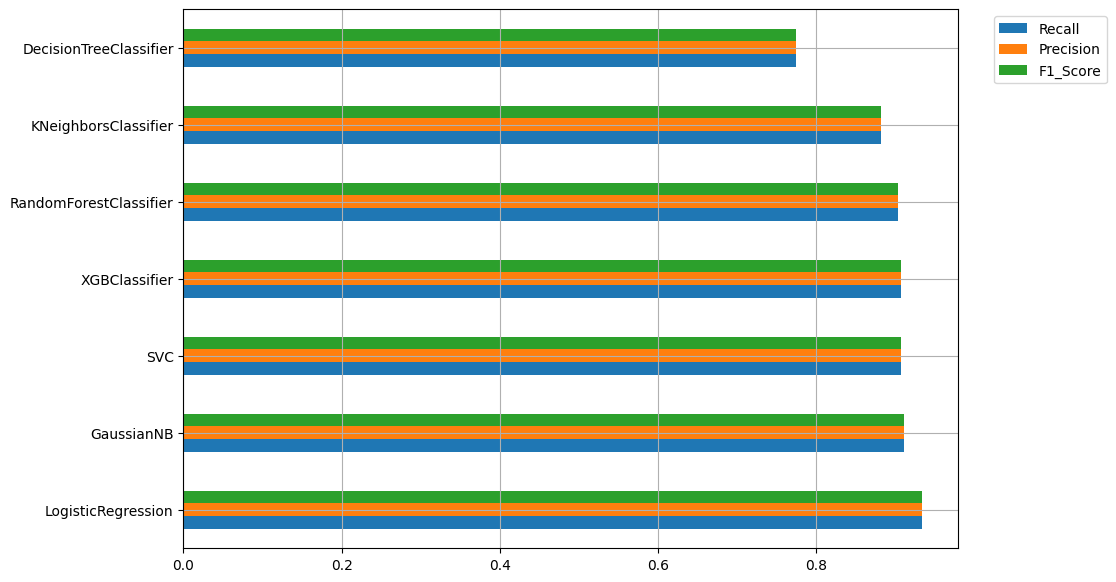

In [29]:
result_df.plot(kind="barh", figsize=(10, 7), grid=True).legend(bbox_to_anchor=(1.2,1));

**Какой можно подвести итог:**

Я не смог определиться какой метод обучения выбрать, поэтому рассмотрел несколько (информацию по некоторым даже пришлось поискать отдельно, например про Гауссиан) Поскольку как я уже писал ранее набор с видами фиников качественно похож на тот, с которым мне предстоит работать (различные перовскитные частицы), то данный анализ видов ML помог мне определить какое обучение наиболее подходит к подобному набору данных - **логистическая регрессия**. Это ожидаемо поскольку именно данный вид позволяет хорошо определят различия и относить какой-то отдельный финик к его сорту исходя из его параметров и свойств

**Метрику** я взял **recall, precision** и **f меру**

Конкретной причины почему именно такая метрика нет, мне просто показалась она интуитивно понятнее и проще в применении

--------------------------------------------------------------------------------------------------------------------

Возможно до конца курса я еще что-нибудь доделаю / исправлю исходя из ваших комментариев, поскольку на первый взгляд проделанная работа может оказаться короткой. Но на данный момент данный код мне показался достаточно лаконичным и законченным: проведенный анализ показал результаты и помог выбрать самый точный метод. Поэтому было принято решение остановиться, чтобы не опоздать по сдаче еще раз.

(Напишите пожалуйста, если данная работа слишком мала, для получения зачета по курсу я придумаю что еще можно сделать с этим набором)

Что еще хочется сказать. Большое спасибо за курс, несмотря на то, что я проходил его в достаточно сжатые сроки (из-за того что сессия закончилась только 18 февраля), я все равно успел достаточно хорошо освоить базу ML которую я теперь смогу применить не только в своей работе, но и в куче сторонних проектов.